In [1]:
import pandas as pd
import numpy as  np
import scipy as sp
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import RegexpStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tag import DefaultTagger
from autocorrect import spell
from textblob import TextBlob
from textblob import Word
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB #binary ise bernoulliNB,gaussaianNB eğer 3 seneçek varsa evet,hayır nötr gibi multinomialNB kullancvaaz
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob,Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
gas=GaussianNB()
ber=BernoulliNB()
from xgboost import XGBClassifier
xgbc=XGBClassifier()


In [2]:
df=pd.read_csv('amazon.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Unnamed: 0      1689188 non-null  int64 
 1   reviewerID      1689188 non-null  object
 2   asin            1689188 non-null  object
 3   reviewerName    1664309 non-null  object
 4   helpful         1689188 non-null  object
 5   reviewText      1688117 non-null  object
 6   overall         1689188 non-null  int64 
 7   summary         1689173 non-null  object
 8   unixReviewTime  1689188 non-null  int64 
 9   reviewTime      1689188 non-null  object
dtypes: int64(3), object(7)
memory usage: 128.9+ MB


In [4]:
df

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
...,...,...,...,...,...,...,...,...,...,...
1689183,1689183,A34BZM6S9L7QI4,B00LGQ6HL8,"Candy Cane ""Is it just me?""","[1, 1]",Burned these in before listening to them for a...,5,Boom -- Pop -- Pow. These deliver.,1405555200,"07 17, 2014"
1689184,1689184,A1G650TTTHEAL5,B00LGQ6HL8,"Charles Spanky ""Zumina Reviews""","[0, 0]",Some people like DJ style headphones or earbud...,5,"Thin and light, without compromising on sound ...",1405382400,"07 15, 2014"
1689185,1689185,A25C2M3QF9G7OQ,B00LGQ6HL8,Comdet,"[0, 0]",I&#8217;m a big fan of the Brainwavz S1 (actua...,5,Same form factor and durability as the S1 with...,1405555200,"07 17, 2014"
1689186,1689186,A1E1LEVQ9VQNK,B00LGQ6HL8,J. Chambers,"[0, 0]","I've used theBrainwavz S1 In Ear Headphones, a...",5,Superb audio quality in a very comfortable set...,1405641600,"07 18, 2014"


In [5]:
df['reviewText']=df['reviewText'].str.lower()

In [6]:
df['reviewText']=df['reviewText'].str.replace('\d+','')

C:\Users\bilal\AppData\Local\Temp\ipykernel_4988\3766240751.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviewText']=df['reviewText'].str.replace('\d+','')


In [7]:
df['reviewText']=df['reviewText'].str.replace('[^\w\s]','')

C:\Users\bilal\AppData\Local\Temp\ipykernel_4988\725079569.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviewText']=df['reviewText'].str.replace('[^\w\s]','')


In [8]:
df['reviewText']=df['reviewText'].str.replace('\n',' ').replace('\r','')

In [9]:
df.loc[df['overall']==3,'sentiment']='notr'
df.loc[df['overall']>3,'sentiment']='positive'
df.loc[df['overall']<3,'sentiment']='negative'

In [10]:
df

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",we got this gps for my husband who is an otr o...,5,Gotta have GPS!,1370131200,"06 2, 2013",positive
1,1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]",im a professional otr truck driver and i bough...,1,Very Disappointed,1290643200,"11 25, 2010",negative
2,2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]",well what can i say ive had this unit in my t...,3,1st impression,1283990400,"09 9, 2010",notr
3,3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]",not going to write a long review even thought ...,2,"Great grafics, POOR GPS",1290556800,"11 24, 2010",negative
4,4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",ive had mine for a year and heres what we got ...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011",negative
...,...,...,...,...,...,...,...,...,...,...,...
1689183,1689183,A34BZM6S9L7QI4,B00LGQ6HL8,"Candy Cane ""Is it just me?""","[1, 1]",burned these in before listening to them for a...,5,Boom -- Pop -- Pow. These deliver.,1405555200,"07 17, 2014",positive
1689184,1689184,A1G650TTTHEAL5,B00LGQ6HL8,"Charles Spanky ""Zumina Reviews""","[0, 0]",some people like dj style headphones or earbud...,5,"Thin and light, without compromising on sound ...",1405382400,"07 15, 2014",positive
1689185,1689185,A25C2M3QF9G7OQ,B00LGQ6HL8,Comdet,"[0, 0]",im a big fan of the brainwavz s actually all o...,5,Same form factor and durability as the S1 with...,1405555200,"07 17, 2014",positive
1689186,1689186,A1E1LEVQ9VQNK,B00LGQ6HL8,J. Chambers,"[0, 0]",ive used thebrainwavz s in ear headphones and ...,5,Superb audio quality in a very comfortable set...,1405641600,"07 18, 2014",positive


In [11]:
df=df[['overall','sentiment','reviewText']]

In [12]:
df['reviewText'].fillna('none',inplace=True)

C:\Users\bilal\AppData\Local\Temp\ipykernel_4988\3271582461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'].fillna('none',inplace=True)


In [13]:
df.isnull().sum()

overall       0
sentiment     0
reviewText    0
dtype: int64

In [ ]:
df['sentiment']=df['sentiment'].replace('positive','2')
df['sentiment']=df['sentiment'].replace('notr','1')
df['sentiment']=df['sentiment'].replace('negative','0')

In [27]:
df['sentiment']=df['sentiment'].astype(int)

C:\Users\bilal\AppData\Local\Temp\ipykernel_4988\3364164551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment']=df['sentiment'].astype(int)


In [28]:
x=df['reviewText']
y=df['sentiment']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [17]:
vect=CountVectorizer(stop_words='english')
x_train_dtm=vect.fit_transform(x_train)
print(x_train_dtm)
x_test_dtm=vect.transform(x_test)

  (0, 374227)	1
  (0, 417887)	1
  (0, 226701)	1
  (0, 702012)	1
  (0, 473521)	1
  (0, 102366)	1
  (0, 1033762)	1
  (0, 174505)	1
  (0, 325265)	1
  (0, 248977)	1
  (0, 900138)	1
  (0, 658687)	1
  (0, 495647)	2
  (0, 573060)	1
  (0, 226515)	1
  (0, 513713)	1
  (0, 143023)	1
  (0, 826996)	1
  (0, 389278)	1
  (0, 335912)	1
  (0, 517257)	1
  (0, 306331)	1
  (1, 102366)	1
  (1, 752780)	1
  (1, 146825)	1
  :	:
  (1266890, 821362)	1
  (1266890, 1015073)	1
  (1266890, 780350)	3
  (1266890, 394623)	1
  (1266890, 416528)	1
  (1266890, 636593)	1
  (1266890, 843068)	2
  (1266890, 211818)	1
  (1266890, 42174)	1
  (1266890, 341570)	1
  (1266890, 428445)	1
  (1266890, 301039)	1
  (1266890, 808645)	1
  (1266890, 710298)	1
  (1266890, 295113)	1
  (1266890, 15781)	1
  (1266890, 405166)	1
  (1266890, 284009)	1
  (1266890, 662079)	2
  (1266890, 869216)	1
  (1266890, 620865)	1
  (1266890, 202132)	1
  (1266890, 779945)	2
  (1266890, 72899)	1
  (1266890, 534458)	1


In [18]:
vect=CountVectorizer(ngram_range=(1,2))
x_train_dtm=vect.fit_transform(x_train)
x_train_dtm.shape

(1266891, 12056013)

In [19]:
print(vect.get_feature_names()[-50:])

['zzxt switch', 'zzy', 'zzy people', 'zzz', 'zzz alt', 'zzz clack', 'zzz dddd', 'zzz marking', 'zzz they', 'zzz zz', 'zzz zzz', 'zzzs', 'zzzsthe', 'zzzsthe length', 'zzzz', 'zzzz change', 'zzzz clack', 'zzzz save', 'zzzz sound', 'zzzz thing', 'zzzz youll', 'zzzz zzz', 'zzzz zzzz', 'zzzziiiipppp', 'zzzziiiipppp your', 'zzzzit', 'zzzzit sound', 'zzzzs', 'zzzzs ive', 'zzzzz', 'zzzzz but', 'zzzzz then', 'zzzzz vibration', 'zzzzzno', 'zzzzzno chance', 'zzzzzz', 'zzzzzz wake', 'zzzzzzz', 'zzzzzzz as', 'zzzzzzzzbaaaahhhh', 'zzzzzzzzbaaaahhhh is', 'zzzzzzzzip', 'zzzzzzzzip you', 'zzzzzzzztsnap', 'zzzzzzzztsnap proclaimed', 'zzzzzzzzzzip', 'zzzzzzzzzzip zoom', 'zzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzzzzfirst', 'zzzzzzzzzzzzzzzzzzzzfirst build']


In [20]:
def tokenize_test(vect):
    x_train_dtm=vect.fit_transform(x_train)
    print('Features: ',x_train_dtm.shape[1])
    x_test_dtm=vect.transform(x_test)
    nb=MultinomialNB()
    nb.fit(x_train_dtm,y_train)
    y_pred_class=nb.predict(x_test_dtm)
    print('MULTİNOMİAL Accuracy: ',metrics.accuracy_score(y_test,y_pred_class))  

In [24]:
def tokenize_test8(vect):
    x_train_dtm=vect.fit_transform(x_train)
    print('Features: ',x_train_dtm.shape[1])
    x_test_dtm=vect.transform(x_test)
    xgbc=XGBClassifier()
    xgbc.fit(x_train_dtm,y_train)
    y_pred_class8=xgbc.predict(x_test_dtm)
    print('XGBC Accuracy: ',metrics.accuracy_score(y_test,y_pred_class8))

In [22]:
vect=CountVectorizer(ngram_range=(1,2))
tokenize_test(vect)

Features:  12056013
MULTİNOMİAL Accuracy:  0.83751482961044


In [30]:
print(tokenize_test8(vect))

Features:  12056013
XGBC Accuracy:  0.854211609364973
None


In [31]:
vect=CountVectorizer()
tokenize_test(vect)

Features:  1054251
MULTİNOMİAL Accuracy:  0.8373206534737401


In [32]:
print(tokenize_test8(vect))

Features:  1054251
XGBC Accuracy:  0.8474059725738047
None


In [33]:
vect=CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  1053936
MULTİNOMİAL Accuracy:  0.8356464762951193


In [34]:
print(tokenize_test8(vect))

Features:  1053936
XGBC Accuracy:  0.8401740954825632
None


In [35]:
print(vect.get_stop_words())

frozenset({'latter', 'third', 'rather', 'amoungst', 'it', 'eight', 'perhaps', 'twenty', 'four', 'during', 'a', 'mine', 'whereas', 'whom', 'meanwhile', 'your', 'top', 'only', 'another', 'con', 'un', 'system', 'beside', 'nevertheless', 'also', 'always', 'us', 'eleven', 'here', 'ever', 'full', 'sixty', 'against', 'wherever', 'due', 'to', 'whether', 'seeming', 'herein', 'its', 'had', 'or', 'via', 'least', 'describe', 'whole', 'his', 'as', 'anywhere', 'upon', 'twelve', 'onto', 'each', 'anything', 'while', 'other', 'up', 'hasnt', 'whereafter', 'yours', 'fifty', 'part', 'well', 'what', 'there', 're', 'get', 'please', 'yet', 'enough', 'beforehand', 'wherein', 'co', 'still', 'ten', 'towards', 'found', 'both', 'nine', 'were', 'hence', 'became', 'herself', 'moreover', 'namely', 'bill', 'elsewhere', 'side', 'me', 'never', 'them', 'everywhere', 'put', 'front', 'my', 'across', 'empty', 'others', 'else', 'per', 'from', 'either', 'somewhere', 'hereafter', 'move', 'must', 'than', 'along', 'toward', 'no

In [36]:
import re
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [37]:
def create_wordcloud(text): 
    mask = np.array(Image.open("cloud.png")) 
    stopwords = set(STOPWORDS) 
    wc = WordCloud(background_color='white', mask = mask, max_words=25000, stopwords=stopwords) 
    wc.generate(str(text)) 
    wc.to_file("wc.png") 
    print("Word Cloud Saved Successfully") 
    path="wc.png" 
    display(Image.open(path))

In [38]:
text1=df[df['overall']==1]

Word Cloud Saved Successfully


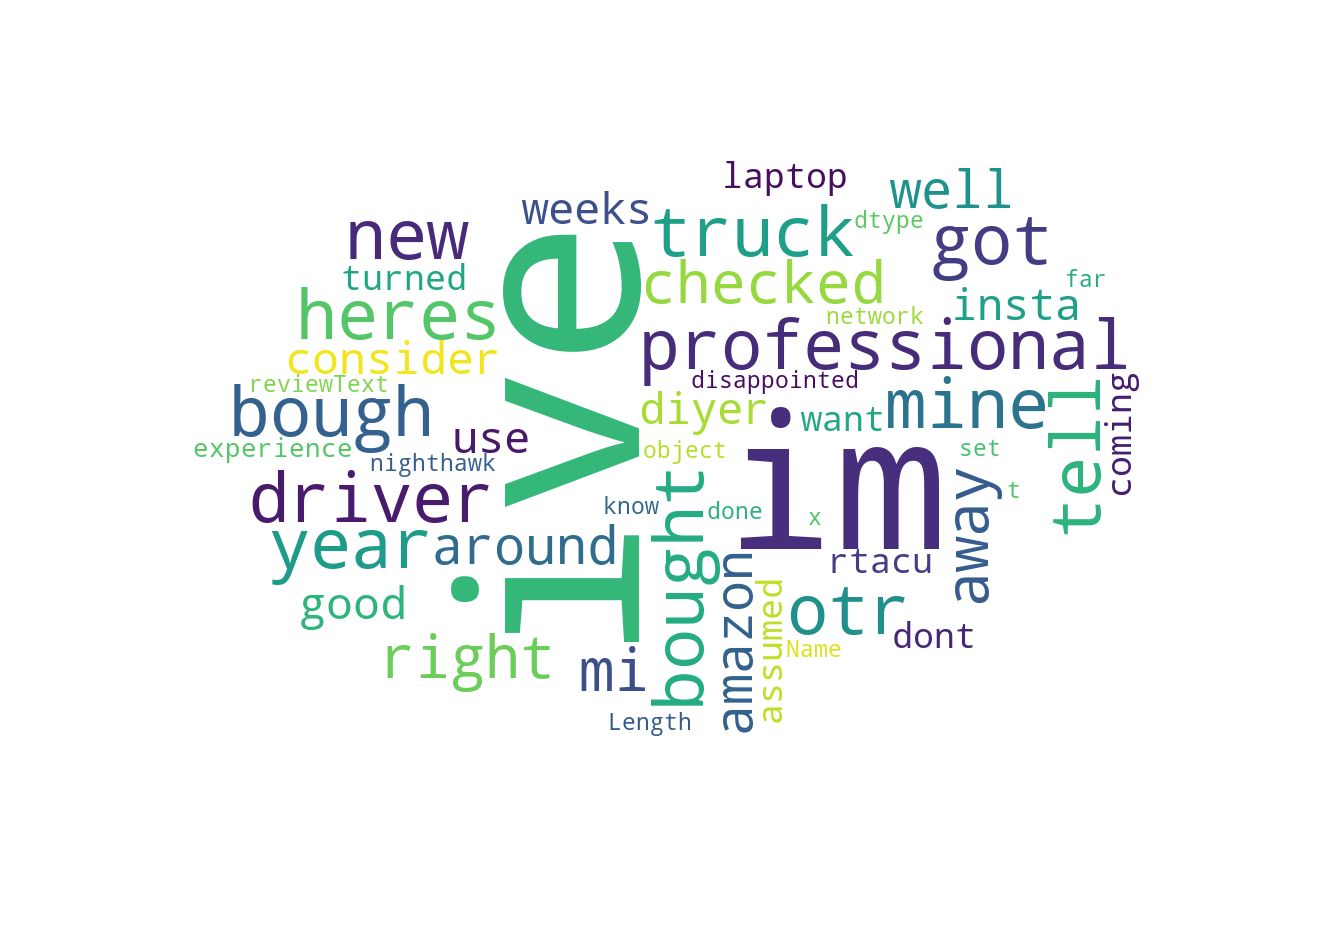

In [39]:
create_wordcloud(text1.reviewText)

In [40]:
text2=df[df['overall']==5]

Word Cloud Saved Successfully


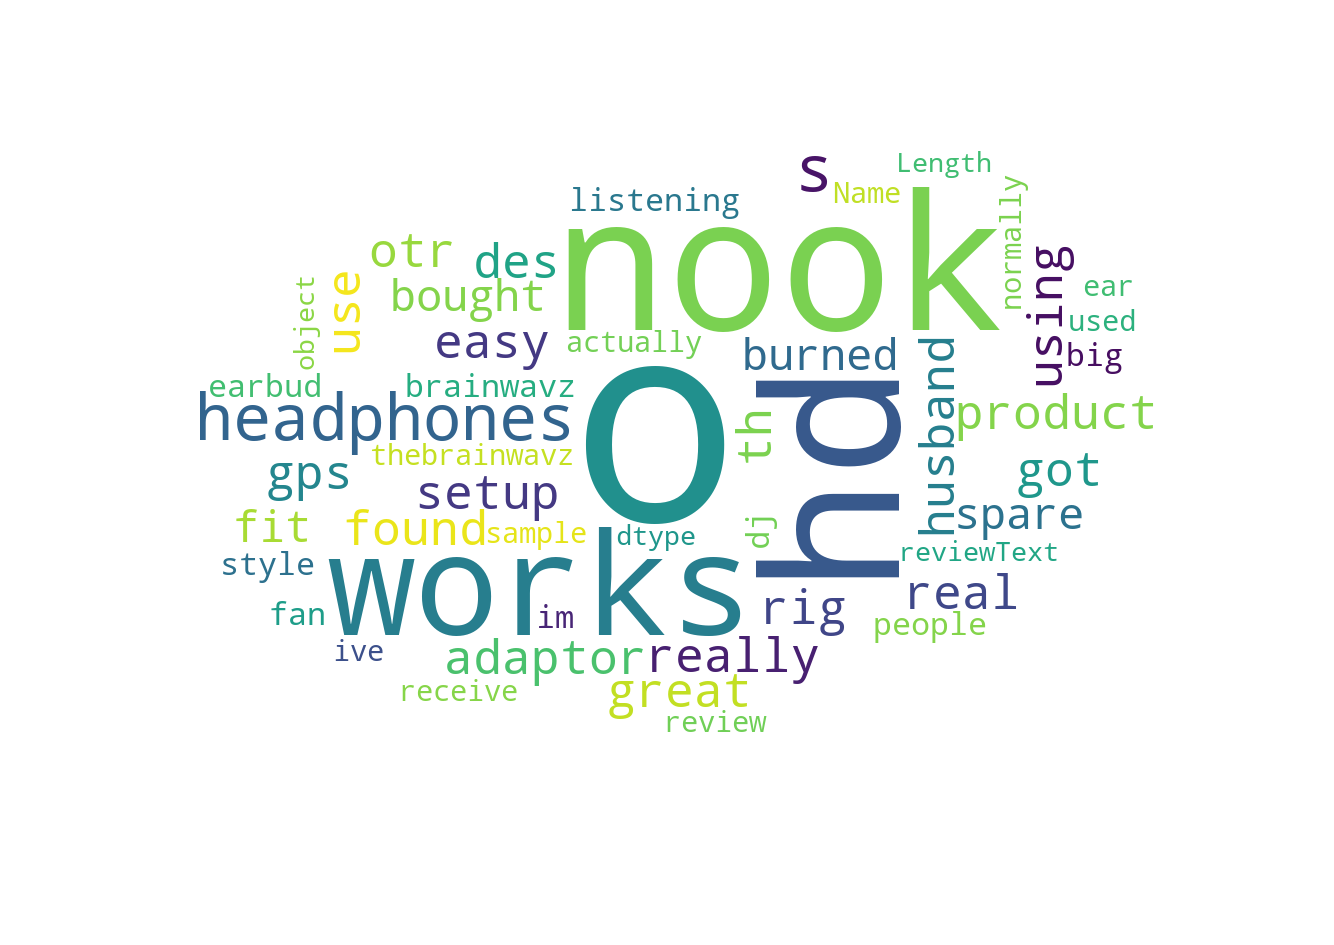

In [41]:
create_wordcloud(text2.reviewText)

In [43]:
vect=TfidfVectorizer(stop_words='english')
dtm=vect.fit_transform(df.reviewText)
features=vect.get_feature_names()
dtm.shape

(1689188, 1285472)

In [44]:
def summarize(): 
    review_length = 0 
    while review_length < 300: 
        review_id = np.random.randint(0, len(df))
        review_text = str(df.reviewText[review_id])  
        review_length = len(review_text)  
    word_scores={} 
    for word in TextBlob(review_text).words: 
        word = word.lower() 
        if word in features: 
            word_scores[word] = dtm[review_id, features.index(word)] 
    print ('TOP SCORING WORDS:') 
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5] 
    for word, score in top_scores: 
        print (word) 
    print ('\n' + review_text) 

In [45]:
summarize()

TOP SCORING WORDS:
reprinted
card
problems
android
stamped

this is a top notch card i had no problems getting it to install on my android tablet as with any data card though you have to take care that your device can handle this large of a card it can be formatted with ease from either your device or your computer for me this meant fat  so i could move part of my music library onto it now i can play my tunes on my android tablet got a nd one for my samsung phone for the same reason  both are working great with no problems these are true  gb cards slightly less due to the formatting unlike some out there that have been cleaned and reprinted with  gb stamped on them when they really arent so you can feel confident in buying these there are no know problems that i have seen with this product
